# CLUST Motion Tracking Project
Mélanie Bernhardt - ETH Zurich - Data Science MSc

This notebook provides a simple way to train the model, to predict the location of features from a saved model and to visualize the predictions. 

### First set up the environment
WARNING: in order to be able to run this notebook the `DATA_PATH`, `EXP_PATH`and `TEST_PATH` have to be properly set prior to starting the jupyter server. 

In [1]:
from dataLoader import DataLoader
from network import create_model
from custom_KFold import MyKFold
from utils import get_logger, get_default_params, plot_img_template
from global_tracking import train, predict, run_global_cv
import os
import logging
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from tensorflow import keras
from IPython import display

## Define the parameters of the experiment

In [2]:
# ============ DATA AND SAVING DIRS SETUP ========== #
data_dir = os.getenv('DATA_PATH')
test_dir = os.getenv('TEST_PATH')
exp_dir = os.getenv('EXP_PATH')

In [3]:
exp_name = 'FINAL'
params_dict = {'dropout_rate': 0.5, 'n_epochs': 15,
               'h3': 0, 'embed_size': 256, 'width': 60}

checkpoint_dir = os.path.join(exp_dir, exp_name)
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)
params_dict = get_default_params(params_dict)

## Option 1: train the model from scratch
If a validation generator is provided then it uses early stopping else not. `train` automatically saves the model weigths and the temporal estimators to the checkpoint dir (necessary for `predict` to work properly).

In [ ]:
traindirs = np.asarray([dI for dI in os.listdir(data_dir) if (
                        os.path.isdir(os.path.join(data_dir, dI))
                        and not dI == 'feats_matrices')])
model, est_c1, est_c2 = train(traindirs, data_dir,
                              upsample=False, 
                              params_dict=params_dict,
                              checkpointdir=checkpoint_dir,
                              logger=None,
                              validation_gen=None)

## Option 2: Predict from a saved model
The `predict` function restores the models saved in the `checkpoint_dir`. It runs computes the feature location for every frame of every sequences in the test directories. For each test sequence, the results are saved in a tab separated file named `SequenceName_PointNumber.txt` (as required by the submission format of the CLUST Challenge). The files are also stored in the `checkpoint_dir`.

In [4]:
testdirs = np.asarray([dI for dI in os.listdir(test_dir) if (
                        os.path.isdir(os.path.join(test_dir, dI))
                        and not dI == 'feats_matrices')])
predict(testdirs, checkpoint_dir, test_dir, params_dict)

(?, 61, 61, 1)
(?, 14, 14, 64)


/Applications/miniconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator RidgeCV from version 0.19.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


CIL-03_1.txt
100
200
300
400
500
600
700
800
900
7.559387
2.385788
1000
CIL-03_2.txt
100
200
300
400
500
600
700
800
900
1000
CIL-04_1.txt
100
200
300
400
500
600
700
800
CIL-04_2.txt
100
200
300
400
500
600
700
800
CIL-05_1.txt
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
CIL-05_2.txt
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
ETH-06-1_1.txt
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
ETH-06-2_1.txt
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
ETH-07-1_1.txt
1.3122101
6.27713
1.6404877
13.108063
100
2.7138977
9.58429
23.44521857910155
66.8429180175781

3.964035
6.2481995
1.4756622
10.240143
2400
29.754876845703137
62.67407434570313
2.1943512
7.5443115
5.7946167
8.660889
0.08543396
9.479187
7.778244
5.1887207
2500
29.3143403466797
64.43374841796876
2.7539825
7.72583
6.250534
8.773651
0.934433
11.8471985
29.309060805664075
65.00735681640626
2600
7.157089
7.840332
0.6760864
12.291168
28.967614882812512
66.20892541992188
3.7516632
7.3201294
2.5529785
7.9347534
8.465744
9.936157
2700
31.014550917968762
63.46216028320313
4.9393005
7.365814
2.8826294
10.477753
2800
34.03579115234376
60.55737512695313
2.9365082
6.740219
0.876709
7.1760864
3.401291
12.967041
35.72590040527345
59.17541711914063
2900
0.29814148
8.852264
5.6082916
8.549957
1.6231384
10.636414
2.9198608
6.576599
36.8713471826172
59.97989099609376
3000
3.3115234
6.1719666
2.3364868
10.888092
4.470749
6.6595764
31.926843398437512
63.73242395507813
2.52948
7.725464
3.849411
7.501953
1.3657684
9.558472
6.0365143
4.5197144
3100
29.018457167968762
66.79062097656251
0.22178053222657468


4600
59.492808134765625
155.45857115234372
4700
59.407297880859375
161.4210650488281
4800
50.368906767578125
140.20030088867185
4900
57.940806181640625
146.73594541992185
5000
3.1289215
6.743164
2.2668915
8.037384
0.85849
9.443024
26.988184721679687
169.3918902441406
43.18718984863281
112.0278765722656
5100
40.41860464355469
166.99195738281247
5200
2.2881775
6.2879333
1.9473419
6.573395
2.642685
6.5231934
2.9979248
7.235016
31.39701345703125
171.25752134765622
2.3555603
8.658417
1.0180206
9.883209
26.671702177734375
165.8696734472656
5300
2.9629211
7.209503
2.041748
8.534271
1.3148499
9.640869
27.356653959960937
171.57722349609372
60.315195830078125
163.6279742285156
5400
59.74540212890625
147.26893492187497
5500
52.87113455078125
148.49799986328122
2.6240692
6.111267
1.841507
9.170593
0.8623657
10.074646
26.82401541015625
167.08515806640622
ETH-09-1_1.txt
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
4.021179
8.233276
1900
2000
2100
2200
2300
2400
25

5100
5200
5300
5400
5500
ETH-10-2_2.txt
42.501357402343785
17.44505587890623
100
62.025314960937465
26.385846220703144
13.503906
10.341797
200
300
400
6.5802917
3.9930725
500
42.20982297851566
19.27452365234373
600
72.02012697265621
40.937787138671894
700
67.31416383789059
34.662274443359394
7.3494263
0.2977295
69.22679201171871
2.1873349316406063
800
33.643601093749965
20.00932589843748
900
65.39790407226559
30.85592373535158
83.40968385742184
33.490923798828106
1000
65.70735231445309
28.83620937988283
11.114638652343785
2.0746945507812313
8.486664
8.009735
1100
1200
1300
1400
1500
38.82542356445316
17.005633271484356
14.82962
12.439117
6.518036
3.4124756
1600
1700
1800
6.098236
2.0857544
1900
6.2220154
2.526245
2000
50.079238261718785
22.89433566406248
2100
6.22876
0.09017944
74.16685548828121
31.248797333984356
2200
70.70658937499996
41.08700283691408
63.15235963867184
27.295453154296894
10.701447
3.9557037
7.828949
6.9601746
2300
2400
2500
2600
48.958754863281285
22.86766330078123


1900
7.3040466
1.7087097
2000
2100
2200
2300
2400
9.8862915
2.8954163
2500
10.278503
4.4729004
2600
7.877411
4.7161407
2700
2800
2900
3000
3100
3200
6.527954
3.6004333
8.3862
5.092453
3300
9.282471
5.053543
9.626465
4.744339
3400
10.681641
3.139206
6.068115
3.086563
3500
7.338562
2.4153595
6.045868
3.1867218
9.795654
5.042328
3600
3700
8.37558
3.2090912
ETH-12-1_1.txt
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
6.187683
1.0391693
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
1200

300
2.5785679931640573
116.11786402832031
400
6.955399047851557
108.11832179199219
500
600
5.074387084960932
107.78375758300781
19.551635253906255
88.06071986328125
700
53.99418591308594
84.68158473144531
800
62.26240490722657
75.81894435058594
900
24.12350415039063
81.93568934570312
1000
59.74925183105469
87.10544337402344
1100
6.173095214843755
98.09206141601562
62.86927746582032
65.56195582519531
1200
49.31449841308594
107.57097376953125
1300
7.357039916992193
103.28618373046875
1400
4.6318817
6.325821
1500
52.782226074218755
94.36465968261719
4.6158905
6.416687
1600
53.495788085937505
95.01314295898437
1700
6.492187011718755
103.1254781640625
1800
3.462906
6.3296967
61.722960937500005
82.93924464355469
1900
5.15560864257813
100.45045985351562
2000
18.80404614257813
93.76131190429687
2100
54.38587902832032
85.96127833496094
2200
27.35946606445313
44.879964248046875
4.225417602539068
105.77228297363281
2300
0.9067688
6.2546387
18.414779174804693
93.958608046875
2400
54.44081066894532

200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
12.412338
4.546692
1900
2000
2100
2200
2300
2400
MED-06-2_1.txt
100
6.879471
1.91745
6.3031616
0.9258728
3.1360016
7.8534546
8.289398
4.242462
8.148087
3.7447357
200
300
400
500
600
6.278122
3.870346
8.982071
8.586502
10.060257
3.3580017
10.641983
5.233673
6.1536255
2.2884674
700
800
900
1000
6.117401
5.2443085
6.998337
5.5732574
2.3616028
7.1396027
1100
1200
1300
1400
1500
1600
1700
1800
1900
63.055724999999995
34.20125850097659
7.965103
3.4879913
0.50964355
8.539108
0.9647522
6.2153015
3.0899963
8.386597
9.465454
4.2944336
7.626709
4.6266785
8.099304
0.38208008
2000
67.48214711914062
151.59477726562497
6.878036401367183
5.02293888671872
6.51709
8.504105
2100
2200
2300
2400
MED-06-2_2.txt
100
7.8172455
3.2005463
6.270233
1.5426025
6.6490936
1.931488
4.03331
6.317734
8.459045
4.940155
200
300
400
500
600
7.634308
1.8613892
7.9066772
8.830704
9.129913
4.329941
700
800
900
1000
2.9860687
7.2522736
1100
1200
1300

2300
2400
MED-10_1.txt
100
200
300
400
500
41.46048323242189
0.15322138671874086
6.705013593749982
7.027321118164053
6.056732
1.9413605
6.14917
0.688324
36.46667130859373
8.889198559570303
9.676449140624982
7.834282177734366
7.332123
1.3216553
600
700
43.48855241210936
3.9017107666015534
6.2984467
1.702774
800
37.92593034179686
6.392128247070303
55.62121232421873
0.8514783203125091
900
49.69445451171873
11.183845263671884
5.099597612304706
8.010932666015634
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
MED-10_2.txt
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
MED-11_1.txt
6.025833
0.2434845
100
200
300
400
53.73103337890626
20.101886557617178
500
9.164719
1.8919525
7.2884216
0.16769409
600
700
800
900
1000
36.59480291015626
5.718707846679678
6.6675873
0.84724426
1100
6.025055
2.762436
7.9190063
1.9982147
107.95478826171876
23.22122554687499
6.783066
1.1726074
6.5341797
3.6970062
1200
1300
140

3.5691528
6.055359
4.555191
7.272583
3.8278656
7.469208
4.0792847
6.8030396
4.8930817
14.585114
4.400894
9.132172
5.4306793
11.240723
3.6855621
11.193787
85.42196475585936
127.68407727539062
6.9255676
4.234192
6.0490723
11.097321
7.0186615
1.172821
5.5907135
9.446014
5.2033997
6.564575
0.23213196
6.747223
1.0398102
7.5010376
3800
27.4412096826172
65.01992322265625
1.3404828222656135
7.903752314453129
6.4097595
0.4050598


## Option 3: Run the cross-validation on the whole procedure
Runs the across-sequence cross-validation. Each neural model + temporal models are trained on 20 sequences and then predictions are computed for the remaining 4 sequences (5-folds). The results are recorded in a `logfile.log` in the checkpoint directory.  

In [ ]:
# ========== LOGGER SETUP ======== #
logger = get_logger(checkpoint_dir)

# ========= PRINT CONFIG TO LOG ======== #
logger.info('Running %s experiment ...' % exp_name)
logger.info('\n Settings for this expriment are: \n')
for key in params_dict.keys():
    logger.info('  {}: {}'.format(key.upper(), params_dict[key]))
logger.info('Saving checkpoint to {}'.format(checkpoint_dir))

# ======== KFold iterator ========= #
np.random.seed(seed=42)
kf = MyKFold(data_dir, n_splits=5)
fold_iterator = kf.getFolderIterator()

# ======== Run global CV ======= #
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.666)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
tf.keras.backend.set_session(sess)
run_global_cv(fold_iterator, data_dir, checkpoint_dir, logger, params_dict, upsample=False)

## Visualize your predictions

### Get the prediction and the ground truth if available

In [34]:
exp_to_visualize = 'FINAL'
type_data = 'testing'
checkpoint_dir = os.path.join(exp_dir, exp_to_visualize)
sequence_to_visualize = 'ETH-06-1' # data folder to get the images from
feature_to_visualize = 'ETH-06-1_1.txt'# name of the .txt file
if type_data=='training':
    img_dir = os.path.join(data_dir, sequence_to_visualize, 'Data')
else:
    img_dir = os.path.join(test_dir, sequence_to_visualize, 'Data')
pred_feat1 = pd.read_csv(os.path.join(checkpoint_dir, # exp_to_visualize 
                                      '{}.txt'.format(feature_to_visualize)),
                                     sep=',', #'\s+
                                     decimal='.', header=None, names = ['id', 'c1','c2'])
if type_data=='training':
    annotation_dir = os.path.join(data_dir, sequence_to_visualize, 'Annotation')
    true_feat1 = pd.read_csv(os.path.join(annotation_dir, feature_to_visualize),
                                         sep='\s+',
                                         decimal='.', header=None, names = ['id', 'c1','c2'])

### Visualize the initial point with the template

<Figure size 432x288 with 0 Axes>

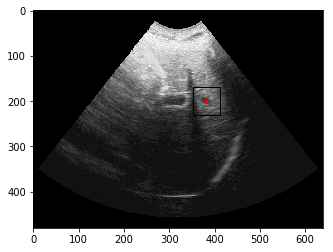

In [10]:
from matplotlib.patches import Rectangle
def plot_img_template(c1,c2,img, width=50, height=50):
    plt.clf()
    x = c1 - width/2
    y = c2 - height/2
    # Create figure and axes
    fig,ax = plt.subplots(1)

    # Display the image
    ax.imshow(img, cmap='gray', vmin=0, vmax=255)
    ax.scatter(c1-1, c2-1, s=10, color='red')
    rect=Rectangle((x,y), width, height, fill=False)
    ax.add_patch(rect)
    plt.show()
i = 1
c1, c2 = pred_feat1.loc[pred_feat1['id']==i, ['c1', 'c2']].values[0]
try:
    img = np.asarray(Image.open(os.path.join(img_dir, '{:04d}.png'.format(int(i)))))
except FileNotFoundError:
    img = np.asarray(Image.open(os.path.join(img_dir, '{:05d}.png'.format(int(i)))))
plot_img_template(c1, c2, img, width=60, height=60)

### Visualize the temporal evolution of feature location

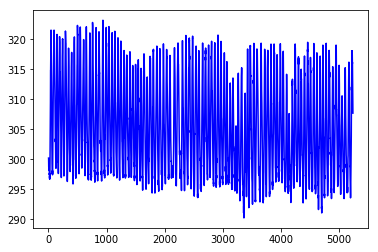

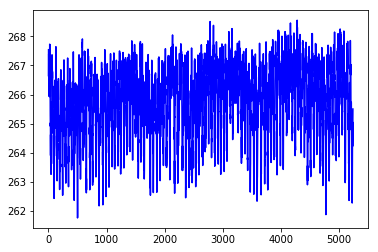

In [31]:
plt.plot(pred_feat1.id, pred_feat1.c1, 'b')
#plt.plot(true_feat1.id, true_feat1.c1, 'r*')
plt.show()
plt.plot(pred_feat1.id, pred_feat1.c2, 'b')
#plt.plot(true_feat1.id, true_feat1.c2, 'r*')
plt.show()

### Visualize the tracking as a video

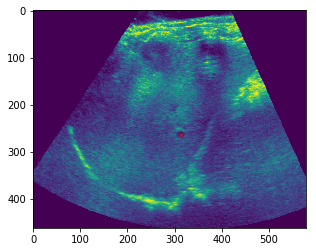

None

KeyboardInterrupt: 

In [33]:
exp_to_visualize = 'FINAL'
type_data = 'testing'
checkpoint_dir = os.path.join(exp_dir, exp_to_visualize)
sequence_to_visualize = 'ETH-06-1' # data folder to get the images from
feature_to_visualize = 'ETH-06-1_1.txt'# name of the .txt file
if type_data=='training':
    img_dir = os.path.join(data_dir, sequence_to_visualize, 'Data')
else:
    img_dir = os.path.join(test_dir, sequence_to_visualize, 'Data')
pred_feat1 = pd.read_csv(os.path.join(checkpoint_dir, # exp_to_visualize 
                                      '{}.txt'.format(feature_to_visualize)),
                                     sep=',', #'\s+
                                     decimal='.', header=None, names = ['id', 'c1','c2'])
if type_data=='training':
    annotation_dir = os.path.join(data_dir, sequence_to_visualize, 'Annotation')
    true_feat1 = pd.read_csv(os.path.join(annotation_dir, feature_to_visualize),
                                         sep='\s+',
                                         decimal='.', header=None, names = ['id', 'c1','c2'])
c1_list = pred_feat1.loc[:, 'c1'].values
c2_list = pred_feat1.loc[:,'c2'].values
n = len(c1_list)
for i in range(1,n,50):
    try:
        img = np.asarray(Image.open(os.path.join(img_dir, '{:05d}.png'.format(i))))
    except FileNotFoundError:
        img = np.asarray(Image.open(os.path.join(img_dir, '{:04d}.png'.format(i))))
    plt.clf()
    plt.imshow(img)
    plt.scatter(c1_list[i-1], c2_list[i-1], 3, 'r')
    display.clear_output(wait=True)
    display.display(plt.show())
    time.sleep(1)

In [ ]:
import matplotlib.animation as animation
def animate(i, img_dir, c1_list, c2_list):
    try:
        img = np.asarray(Image.open(os.path.join(img_dir, '{:05d}.png'.format(i))))
    except FileNotFoundError:
        img = np.asarray(Image.open(os.path.join(img_dir, '{:04d}.png'.format(i))))
    plt.clf()
    plt.imshow(img, cmap='gray')
    plt.scatter(c1_list[i-1], c2_list[i-1], 3, 'r')

In [ ]:
exp_to_visualize = 'FINAL'
type_data = 'testing'
checkpoint_dir = os.path.join(exp_dir, exp_to_visualize)
sequence_to_visualize = 'ETH-06-2' # data folder to get the images from
feature_to_visualize = 'ETH-06-2_1.txt'# name of the .txt file
video_name = 'ETH-06-2_1.mp4'
if type_data=='training':
    img_dir = os.path.join(data_dir, sequence_to_visualize, 'Data')
else:
    img_dir = os.path.join(test_dir, sequence_to_visualize, 'Data')
pred_feat1 = pd.read_csv(os.path.join(checkpoint_dir, # exp_to_visualize 
                                      '{}.txt'.format(feature_to_visualize)),
                                     sep=',', #'\s+
                                     decimal='.', header=None, names = ['id', 'c1','c2'])
if type_data=='training':
    annotation_dir = os.path.join(data_dir, sequence_to_visualize, 'Annotation')
    true_feat1 = pd.read_csv(os.path.join(annotation_dir, feature_to_visualize),
                                         sep='\s+',
                                         decimal='.', header=None, names = ['id', 'c1','c2'])
c1_list = pred_feat1.loc[:, 'c1'].values
c2_list = pred_feat1.loc[:,'c2'].values
n = len(c1_list)
fig = plt.figure(figsize=(10,6))
Writer = animation.writers['ffmpeg']
writer = Writer(fps=16, metadata=dict(artist='Melanie Bernhardt'), bitrate=1800)
n = len(c1_list)
ani = animation.FuncAnimation(fig, animate, fargs=[img_dir, c1_list, c2_list], frames=range(1,n), repeat=True)
ani.save(os.path.join(exp_dir, video_name), writer=writer)

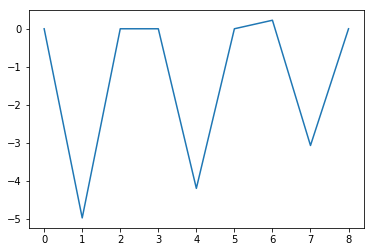

[ 0.         -4.98423624  0.          0.         -4.20547501  0.
  0.22468724 -3.07590017  0.        ]


In [53]:
plt.plot(c2_list[1:10]-c2_list[0:(10-1)])
plt.show()
print(c2_list[1:10]-c2_list[0:(10-1)])

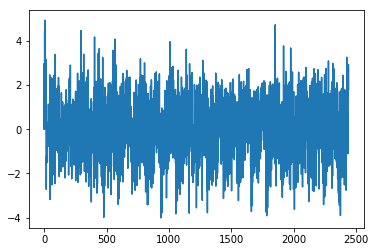

In [54]:
plt.plot(c1_list[1:len(c1_list)]-c1_list[0:len(c1_list)-1])
plt.show()

In [30]:
pred_feat1.head()

,id,c1,c2
0,1,236.230280,204.676970
1,2,236.230280,204.676970
2,3,242.670258,197.262604
3,4,249.922440,193.856567
4,5,256.235809,186.121628
